In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
from keras.models import Sequential

In [4]:
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#from keras.callbacks import EarlyS
from keras.callbacks import EarlyStopping

In [6]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [7]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'

    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

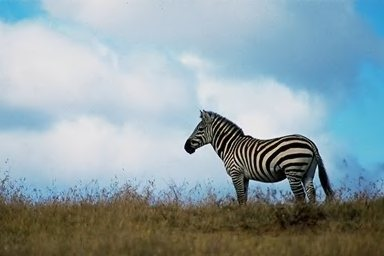

In [8]:
real_image_path = '/content/drive/MyDrive/CASIA2/Au/Au_ani_00001.jpg'
Image.open(real_image_path)

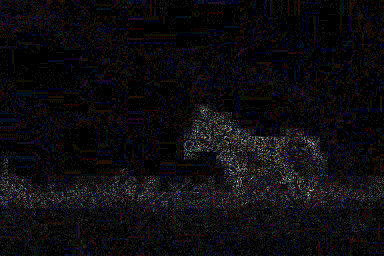

In [9]:
convert_to_ela_image(real_image_path, 90)

In [10]:
image_size = (128, 128)
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

import random
path = '/content/drive/MyDrive/CASIA2/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))


Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
2100 2100


In [11]:
path = '/content/drive/MyDrive/CASIA2/Tp'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
4164 4164


In [12]:
import numpy as np
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)


X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

3331 3331
833 833


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    return model

In [14]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 256)               29491456  
                                                        

In [15]:
from keras import optimizers
import tensorflow as tf
init_lr = 1e-4
optimizer = tf.keras.optimizers.legacy.Adam(lr=init_lr, decay=init_lr/30)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

epochs = 30
batch_size = 32

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [17]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
x_train2 = np.array(X_train, copy=True)
y_train2 = np.array(Y_train, copy=True)

datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      validation_split = 0.2,
      featurewise_center=True,
      featurewise_std_normalization=True,
      fill_mode='nearest')





datagen.fit(X_train)

print(type(X_train))



# earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')

validation_generator = datagen.flow(x_train2, y_train2, batch_size=32, subset='validation')
train_generator = datagen.flow(x_train2, y_train2,batch_size=32, subset='training')

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_acc',min_delta = 0,patience = 2,verbose = 2,mode = 'auto')
# # fits the model on batches with real-time data augmentation:
# history = model.fit_generator(train_generator, epochs=epochs, validation_data = (X_val,Y_val), verbose = 1,callbacks = [earlystopping])


hist = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_val, Y_val),callbacks = [early_stopping])


<class 'numpy.ndarray'>
Epoch 1/30
105/105 [==============================] - ETA: 0s - loss: 0.4966 - accuracy: 0.7385

105/105 [==============================] - 13s 52ms/step - loss: 0.4966 - accuracy: 0.7385 - val_loss: 0.4539 - val_accuracy: 0.7983
Epoch 2/30
105/105 [==============================] - ETA: 0s - loss: 0.3226 - accuracy: 0.8865

105/105 [==============================] - 4s 42ms/step - loss: 0.3226 - accuracy: 0.8865 - val_loss: 0.2854 - val_accuracy: 0.9076
Epoch 3/30
104/105 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.9005

105/105 [==============================] - 5s 44ms/step - loss: 0.2822 - accuracy: 0.9003 - val_loss: 0.3164 - val_accuracy: 0.8872
Epoch 4/30
105/105 [==============================] - ETA: 0s - loss: 0.2605 - accuracy: 0.9099

105/105 [==============================] - 4s 42ms/step - loss: 0.2605 - accuracy: 0.9099 - val_loss: 0.2483 - val_accuracy: 0.9136
Epoch 5/30
105/105 [==============================] - ETA: 0s - loss: 0.2239 - accuracy: 0.9198

105/105 [==============================] - 4s 42ms/step - loss: 0.2239 - accuracy: 0.9198 - val_loss: 0.2576 - val_accuracy: 0.9040
Epoch 6/30
105/105 [==============================] - ETA: 0s - loss: 0.1967 - accuracy: 0.9292

105/105 [==============================] - 5s 44ms/step - loss: 0.1967 - accuracy: 0.9292 - val_loss: 0.2238 - val_accuracy: 0.9232
Epoch 7/30
105/105 [==============================] - ETA: 0s - loss: 0.1810 - accuracy: 0.9304

105/105 [==============================] - 4s 43ms/step - loss: 0.1810 - accuracy: 0.9304 - val_loss: 0.2249 - val_accuracy: 0.9196
Epoch 8/30
105/105 [==============================] - ETA: 0s - loss: 0.1570 - accuracy: 0.9427

105/105 [==============================] - 4s 43ms/step - loss: 0.1570 - accuracy: 0.9427 - val_loss: 0.2050 - val_accuracy: 0.9208
Epoch 9/30
104/105 [============================>.] - ETA: 0s - loss: 0.1516 - accuracy: 0.9456

105/105 [==============================] - 5s 44ms/step - loss: 0.1515 - accuracy: 0.9457 - val_loss: 0.2003 - val_accuracy: 0.9292
Epoch 10/30
105/105 [==============================] - ETA: 0s - loss: 0.1361 - accuracy: 0.9517

105/105 [==============================] - 4s 42ms/step - loss: 0.1361 - accuracy: 0.9517 - val_loss: 0.1895 - val_accuracy: 0.9292
Epoch 11/30
105/105 [==============================] - ETA: 0s - loss: 0.1262 - accuracy: 0.9559

105/105 [==============================] - 4s 42ms/step - loss: 0.1262 - accuracy: 0.9559 - val_loss: 0.1881 - val_accuracy: 0.9316
Epoch 12/30
105/105 [==============================] - ETA: 0s - loss: 0.1085 - accuracy: 0.9610

105/105 [==============================] - 5s 44ms/step - loss: 0.1085 - accuracy: 0.9610 - val_loss: 0.1871 - val_accuracy: 0.9316
Epoch 13/30
105/105 [==============================] - ETA: 0s - loss: 0.0969 - accuracy: 0.9661

105/105 [==============================] - 4s 42ms/step - loss: 0.0969 - accuracy: 0.9661 - val_loss: 0.1887 - val_accuracy: 0.9280
Epoch 14/30
105/105 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.9616

105/105 [==============================] - 4s 42ms/step - loss: 0.0935 - accuracy: 0.9616 - val_loss: 0.2020 - val_accuracy: 0.9280
Epoch 15/30
104/105 [============================>.] - ETA: 0s - loss: 0.0804 - accuracy: 0.9706

105/105 [==============================] - 5s 45ms/step - loss: 0.0804 - accuracy: 0.9706 - val_loss: 0.2073 - val_accuracy: 0.9292
Epoch 16/30
105/105 [==============================] - ETA: 0s - loss: 0.0725 - accuracy: 0.9760

105/105 [==============================] - 4s 42ms/step - loss: 0.0725 - accuracy: 0.9760 - val_loss: 0.2051 - val_accuracy: 0.9232
Epoch 17/30
105/105 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9784

105/105 [==============================] - 4s 43ms/step - loss: 0.0698 - accuracy: 0.9784 - val_loss: 0.1901 - val_accuracy: 0.9352
Epoch 18/30
105/105 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9802

105/105 [==============================] - 5s 44ms/step - loss: 0.0603 - accuracy: 0.9802 - val_loss: 0.2045 - val_accuracy: 0.9256
Epoch 19/30
105/105 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9838

105/105 [==============================] - 5s 43ms/step - loss: 0.0524 - accuracy: 0.9838 - val_loss: 0.2025 - val_accuracy: 0.9304
Epoch 20/30
105/105 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9823

105/105 [==============================] - 4s 42ms/step - loss: 0.0490 - accuracy: 0.9823 - val_loss: 0.2525 - val_accuracy: 0.9268
Epoch 21/30
105/105 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.9805

105/105 [==============================] - 5s 44ms/step - loss: 0.0571 - accuracy: 0.9805 - val_loss: 0.2377 - val_accuracy: 0.9244
Epoch 22/30
105/105 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9796

105/105 [==============================] - 4s 43ms/step - loss: 0.0652 - accuracy: 0.9796 - val_loss: 0.2175 - val_accuracy: 0.9280
Epoch 23/30
105/105 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9883

105/105 [==============================] - 4s 42ms/step - loss: 0.0410 - accuracy: 0.9883 - val_loss: 0.2310 - val_accuracy: 0.9280
Epoch 24/30
104/105 [============================>.] - ETA: 0s - loss: 0.0343 - accuracy: 0.9904

105/105 [==============================] - 5s 45ms/step - loss: 0.0343 - accuracy: 0.9904 - val_loss: 0.2490 - val_accuracy: 0.9280
Epoch 25/30
105/105 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9910

105/105 [==============================] - 5s 43ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.2400 - val_accuracy: 0.9280
Epoch 26/30
105/105 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9916

105/105 [==============================] - 4s 42ms/step - loss: 0.0308 - accuracy: 0.9916 - val_loss: 0.2434 - val_accuracy: 0.9244
Epoch 27/30
104/105 [============================>.] - ETA: 0s - loss: 0.0291 - accuracy: 0.9907

105/105 [==============================] - 5s 45ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.2496 - val_accuracy: 0.9268
Epoch 28/30
105/105 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9931

105/105 [==============================] - 5s 43ms/step - loss: 0.0260 - accuracy: 0.9931 - val_loss: 0.2479 - val_accuracy: 0.9244
Epoch 29/30
105/105 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9949

105/105 [==============================] - 4s 42ms/step - loss: 0.0212 - accuracy: 0.9949 - val_loss: 0.2711 - val_accuracy: 0.9148
Epoch 30/30
105/105 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9955

105/105 [==============================] - 5s 44ms/step - loss: 0.0187 - accuracy: 0.9955 - val_loss: 0.2629 - val_accuracy: 0.9160


In [18]:
model.save('model_casia_run1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


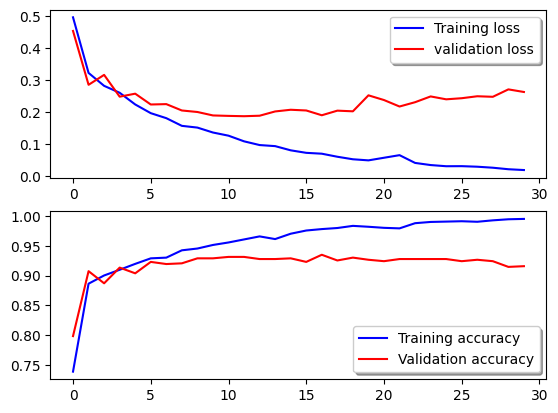

In [19]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix of CNN',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)



    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

27/27 [==============================] - 0s 12ms/step


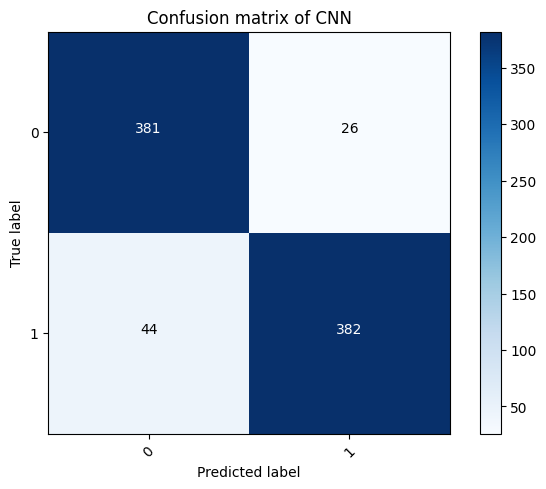

In [21]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))